<a href="https://colab.research.google.com/github/Manounnaa/CLI/blob/main/Student_Exam_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)

**Create Synthetic Dataset**

In [7]:
np.random.seed(42)
n = 200
data = pd.DataFrame({
    'hours_studied': np.random.normal(5, 2, n).clip(0),
    'previous_score': np.random.normal(60, 15, n).clip(0, 100),
    'attendance_rate': np.random.uniform(60, 100, n),
    'internet_usage_hours': np.random.normal(2, 1, n).clip(0),
})
data['pass_exam'] = (
    (data['hours_studied'] * 10 + data['previous_score'] + data['attendance_rate']) > 160
).astype(int)
data.head()

,hours_studied,previous_score,attendance_rate,internet_usage_hours,pass_exam
0,5.993428,65.366810,76.592780,2.337603,1
1,4.723471,68.411768,70.936283,1.588123,1
2,6.295377,76.245769,62.255020,1.512394,1
3,8.046060,75.807031,94.588895,1.567442,1
4,4.531693,39.334959,92.516040,2.394452,1


**Data Visualization**

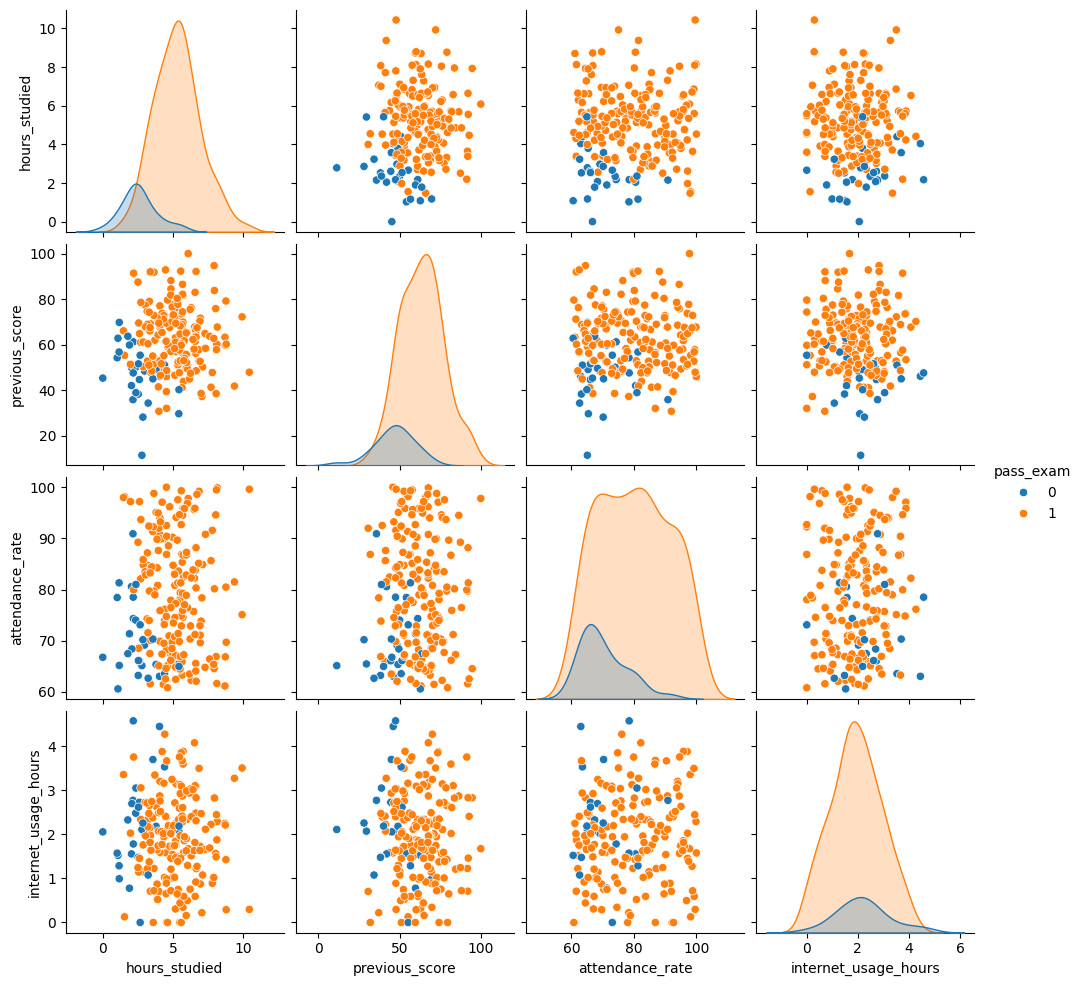

In [8]:
sns.pairplot(data, hue='pass_exam')
plt.show()

**Feature and Target Selection**

In [9]:
X = data[['hours_studied', 'previous_score', 'attendance_rate', 'internet_usage_hours']]
y = data['pass_exam']

**Train-Test Split**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train Logistic Regression Model**

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**Predictions and Evaluation**

In [12]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        35

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



**Confusion Matrix**

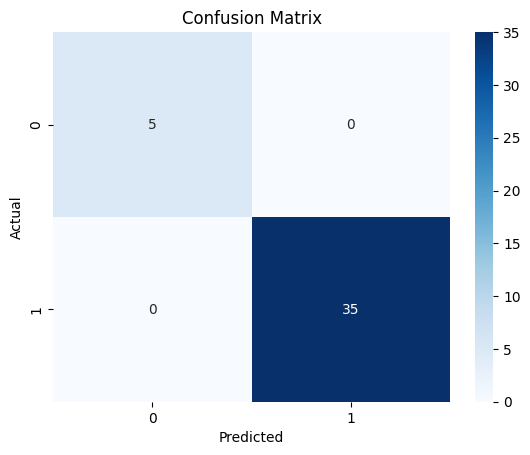

In [13]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**ROC Curve**

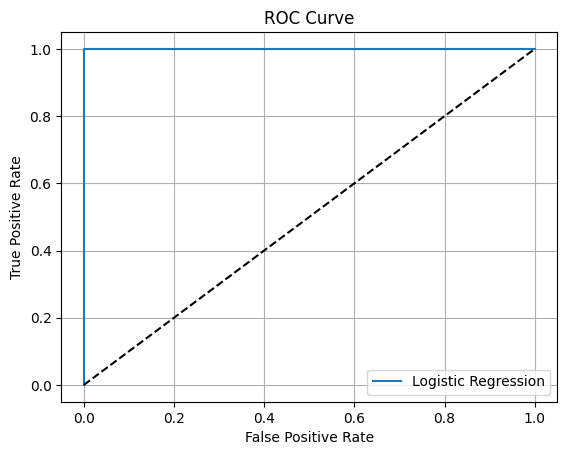

ROC-AUC Score: 1.0


In [14]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
